In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/Users/radhey/Documents/upGrad/assignments/loan.csv')

In [3]:
data.shape

(39717, 111)

In [4]:
#########    DATA CLEANING  ###########
missing_values_count = data.isnull().sum().sort_values(ascending=False)

#### Dropping a column with >50% missing values
threshold = 0.5 * len(data)
columns_to_drop = missing_values_count[missing_values_count > threshold].index
print(columns_to_drop)

Index(['verification_status_joint', 'annual_inc_joint', 'mo_sin_old_rev_tl_op',
       'mo_sin_old_il_acct', 'bc_util', 'bc_open_to_buy', 'avg_cur_bal',
       'acc_open_past_24mths', 'inq_last_12m', 'total_cu_tl', 'inq_fi',
       'total_rev_hi_lim', 'all_util', 'max_bal_bc', 'open_rv_24m',
       'open_rv_12m', 'il_util', 'total_bal_il', 'mths_since_rcnt_il',
       'open_il_24m', 'open_il_12m', 'open_il_6m', 'open_acc_6m',
       'tot_cur_bal', 'tot_coll_amt', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'num_rev_tl_bal_gt_0', 'total_bc_limit',
       'total_bal_ex_mort', 'tot_hi_cred_lim', 'percent_bc_gt_75',
       'pct_tl_nvr_dlq', 'num_tl_op_past_12m', 'num_tl_90g_dpd_24m',
       'num_tl_30dpd', 'num_tl_120dpd_2m', 'num_sats', 'num_rev_accts',
       'mths_since_recent_bc', 'num_op_rev_tl', 'num_il_tl', 'num_bc_tl',
       'num_bc_sats', 'num_actv_rev_tl', 'num_actv_bc_tl',
       'num_accts_ever_120_pd', 'mths_since_recent_revol_delinq',
       'mths_since_rec

In [5]:
cleaned_data = data.drop(labels=columns_to_drop, axis=1, inplace=False)

In [6]:
print("Missing values after cleaning:")
print(cleaned_data.isnull().sum())

Missing values after cleaning:
id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12942
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                 

In [7]:
# check for duplicate rows
cleaned_data[cleaned_data.duplicated()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


In [8]:
# check for columns with unique values in all rows
col_with_unique_val = cleaned_data.nunique()
remove_unique_col = col_with_unique_val[col_with_unique_val.sort_values() == 1].index
print(remove_unique_col)

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')


In [9]:
cleaned_data.drop(labels=remove_unique_col, axis=1, inplace=True)

In [10]:
cleaned_data.shape

(39717, 45)

In [11]:
# drop some more columns which will not be required for analysis, ex- unique values, text data
columns_drop_list4 = ["id", "member_id", "url", "desc","zip_code"]
cleaned_data.drop(columns_drop_list4,axis=1,inplace = True)
cleaned_data.shape


(39717, 40)

In [12]:
cleaned_data.loan_status.value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [13]:
# let's drop loans which are currently open
cleaned_data = cleaned_data[cleaned_data.loan_status.isin(["Fully Paid","Charged Off"])]

In [14]:
# emp_title has most missing values, let's populate the missing values to 'self employed'
cleaned_data['emp_title'] = cleaned_data['emp_title'].fillna('Self Employed')

In [15]:
cleaned_data.info(max_cols=cleaned_data.shape[1])

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                38577 non-null  int64  
 1   funded_amnt              38577 non-null  int64  
 2   funded_amnt_inv          38577 non-null  float64
 3   term                     38577 non-null  object 
 4   int_rate                 38577 non-null  object 
 5   installment              38577 non-null  float64
 6   grade                    38577 non-null  object 
 7   sub_grade                38577 non-null  object 
 8   emp_title                38577 non-null  object 
 9   emp_length               37544 non-null  object 
 10  home_ownership           38577 non-null  object 
 11  annual_inc               38577 non-null  float64
 12  verification_status      38577 non-null  object 
 13  issue_d                  38577 non-null  object 
 14  loan_status              38

In [16]:
from IPython.display import display, Markdown

# Function to display headings
def add_heading(text, level=2):
    display(Markdown(f"{'#' * level} {text}"))

## 1. Employment Length Analysis

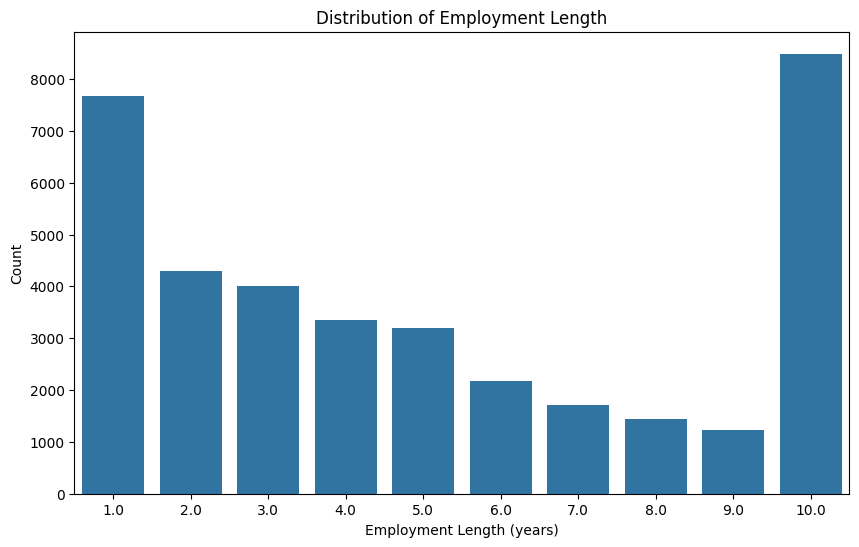

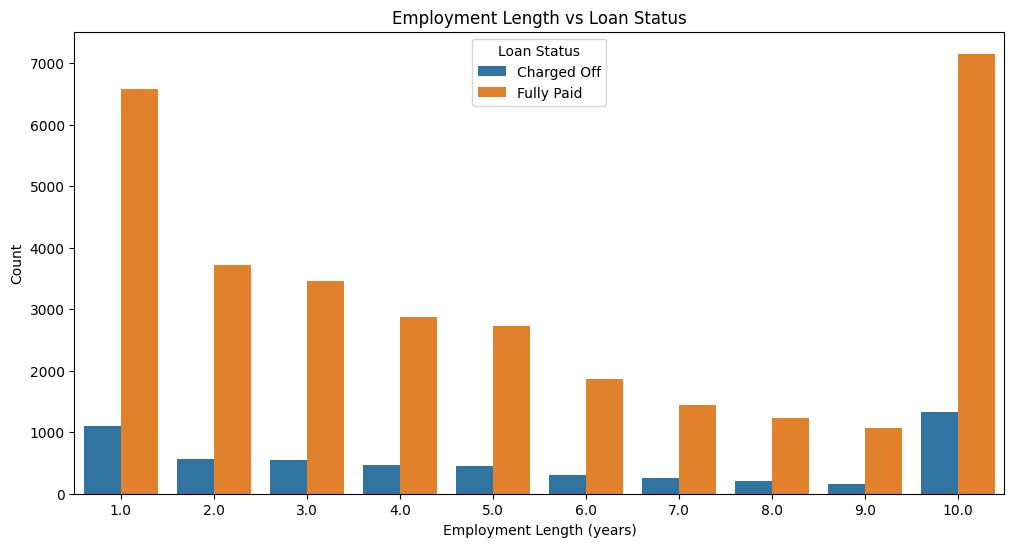

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

add_heading("1. Employment Length Analysis")

# Clean and preprocess emp_length
cleaned_data['emp_length_cleaned'] = cleaned_data['emp_length'].str.extract('(\d+)').astype(float)

# Univariate plot: Distribution of Employment Length
plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_data, x='emp_length_cleaned', order=sorted(cleaned_data['emp_length_cleaned'].dropna().unique()))
plt.title('Distribution of Employment Length')
plt.xlabel('Employment Length (years)')
plt.ylabel('Count')
plt.show()

# Bivariate plot: Employment Length vs Loan Status
plt.figure(figsize=(12, 6))
sns.countplot(data=cleaned_data, x='emp_length_cleaned', hue='loan_status', order=sorted(cleaned_data['emp_length_cleaned'].dropna().unique()))
plt.title('Employment Length vs Loan Status')
plt.xlabel('Employment Length (years)')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

In [18]:
add_heading("Percentage of Charged Off Loans by employement length")

charged_off_data = cleaned_data[cleaned_data['loan_status'] == 'Fully Paid']

# Group data by home ownership and calculate the total and charged-off counts
emp_length_summary = cleaned_data.groupby('emp_length').size().to_frame(name='total_loans')
charged_off_summary = charged_off_data.groupby('emp_length').size().to_frame(name='fully_paid_loans')

summary = emp_length_summary.join(charged_off_summary, how='left').fillna(0)
summary['charged_off_percentage'] = (summary['fully_paid_loans'] / summary['total_loans']) * 100

print(summary)

## Percentage of Charged Off Loans by employement length

            total_loans  fully_paid_loans  charged_off_percentage
emp_length                                                       
1 year             3169              2713               85.610603
10+ years          8488              7157               84.319039
2 years            4291              3724               86.786297
3 years            4012              3457               86.166500
4 years            3342              2880               86.175943
5 years            3194              2736               85.660614
6 years            2168              1861               85.839483
7 years            1711              1448               84.628872
8 years            1435              1232               85.853659
9 years            1226              1068               87.112561
< 1 year           4508              3869               85.825200


Employement length analysis does render any helpful insight in  deciding the loan application

## 2. Home Ownership Analysis

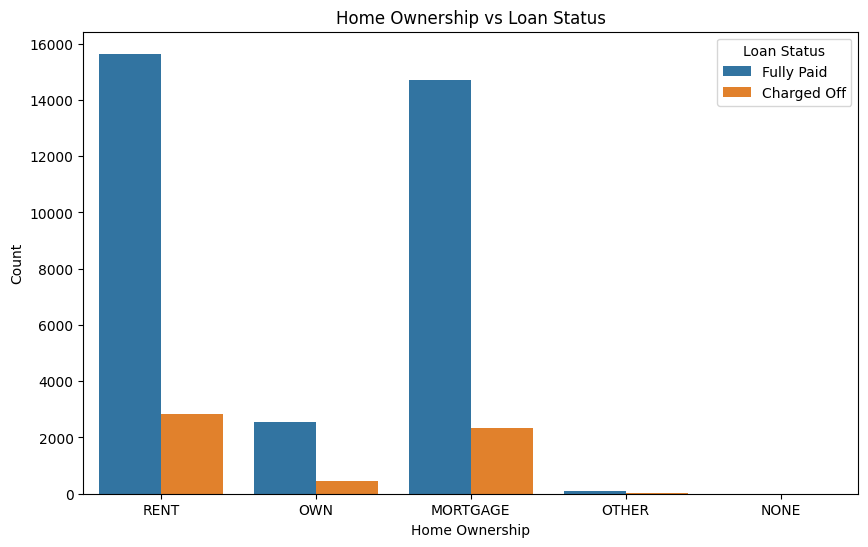

In [19]:
add_heading("2. Home Ownership Analysis")

# Bar plot: Home Ownership vs Loan Status
plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_data, x='home_ownership', hue='loan_status')
plt.title('Home Ownership vs Loan Status')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()


In [21]:
add_heading("Percentage of Charged Off Loans by Home Ownership")

charged_off_data = cleaned_data[cleaned_data['loan_status'] == 'Charged Off']

# Group data by home ownership and calculate the total and charged-off counts
home_ownership_summary = cleaned_data.groupby('home_ownership').size().to_frame(name='total_loans')
charged_off_summary = charged_off_data.groupby('home_ownership').size().to_frame(name='charged_off_loans')

summary = home_ownership_summary.join(charged_off_summary, how='left').fillna(0)
summary['charged_off_percentage'] = (summary['charged_off_loans'] / summary['total_loans']) * 100

# Display the results
print(summary)


## Percentage of Charged Off Loans by Home Ownership

                total_loans  charged_off_loans  charged_off_percentage
home_ownership                                                        
MORTGAGE              17021             2327.0               13.671347
NONE                      3                0.0                0.000000
OTHER                    98               18.0               18.367347
OWN                    2975              443.0               14.890756
RENT                  18480             2839.0               15.362554


## Borrowers with RENT and OWN as their home ownership categories exhibit a slightly higher risk of default compared to those with a MORTGAGE

In [25]:
add_heading("3. Debt to Income Analysis")

## 3. Debt to Income Analysis

In [25]:
# Calculate DTI
cleaned_data['dti'] = (cleaned_data['installment'] / (cleaned_data['annual_inc'] / 12)) * 100

In [29]:
print(cleaned_data['dti'])

0         8.143500
1         2.393200
2         8.259549
3         8.275854
5         5.215333
           ...    
39712     0.855491
39713    18.358667
39714     1.882080
39715     0.932280
39716    13.932545
Name: dti, Length: 38577, dtype: float64


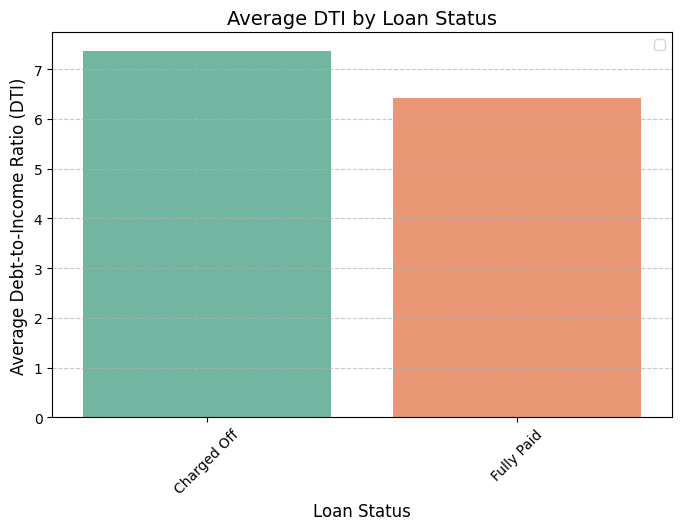

In [36]:
# Calculate the mean DTI for each loan status
dti_mean = cleaned_data.groupby('loan_status')['dti'].mean().reset_index()

# Bar plot for average DTI by Loan Status
plt.figure(figsize=(8, 5))
sns.barplot(data=dti_mean, x='loan_status', y='dti', palette='Set2')
plt.title("Average DTI by Loan Status", fontsize=14)
plt.xlabel("Loan Status", fontsize=12)
plt.ylabel("Average Debt-to-Income Ratio (DTI)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# we can clearly see that people with low debt-to-income ratio are more likely to fully pay the loan amount

In [31]:
add_heading("4. Analysis of Delinquency vs loan_status")

## 4. Analysis of Delinquency vs loan_status

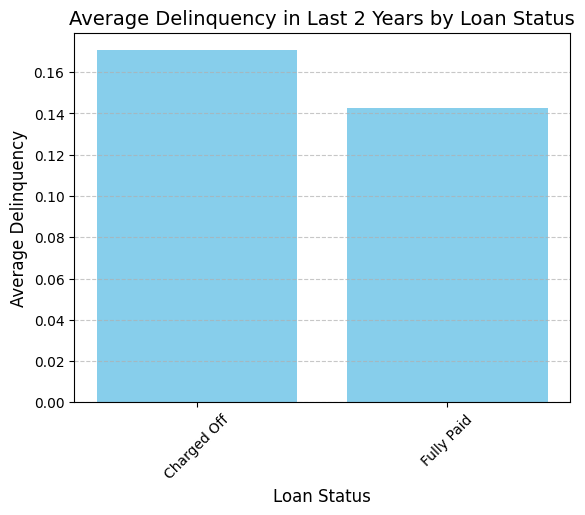

In [29]:


# 1. Delinquency vs Loan Status
delinq_mean = cleaned_data.groupby('loan_status')['delinq_2yrs'].mean()
plt.bar(delinq_mean.index, delinq_mean.values, color='skyblue')
plt.title("Average Delinquency in Last 2 Years by Loan Status", fontsize=14)
plt.xlabel("Loan Status", fontsize=12)
plt.ylabel("Average Delinquency", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [52]:
add_heading("5. Interest Rate Distribution by Loan Status")

## 5. Interest Rate Distribution by Loan Status

## Interest Rate Distribution by Loan Status

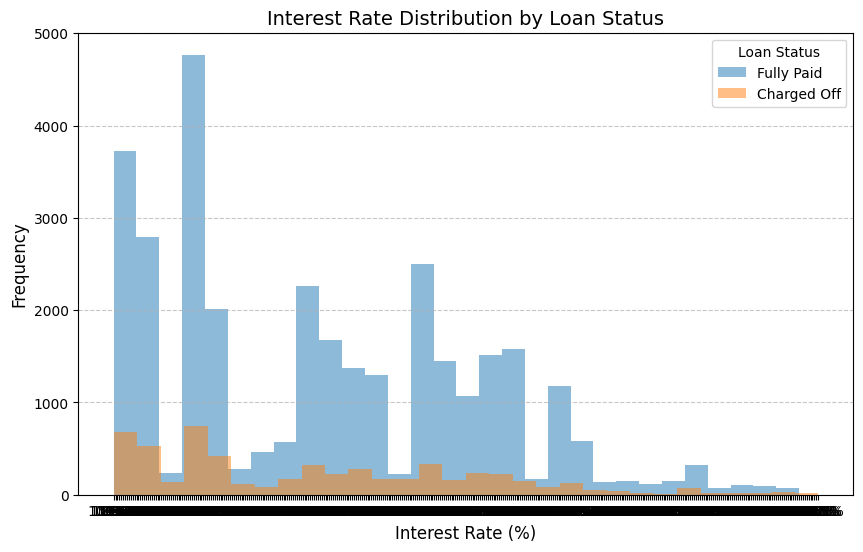

In [49]:


plt.figure(figsize=(10, 6))
for status in cleaned_data['loan_status'].unique():
    subset = cleaned_data[cleaned_data['loan_status'] == status]
    plt.hist(subset['int_rate'], bins=30, alpha=0.5, label=status)
    
plt.title("Interest Rate Distribution by Loan Status", fontsize=14)
plt.xlabel("Interest Rate (%)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend(title="Loan Status")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Analysis -  
## with lower interest rates, people are more likely to take a loan even with poor loan paying capacity. Which increases the chanced of loan defaults.



## Loan Term vs Loan Status

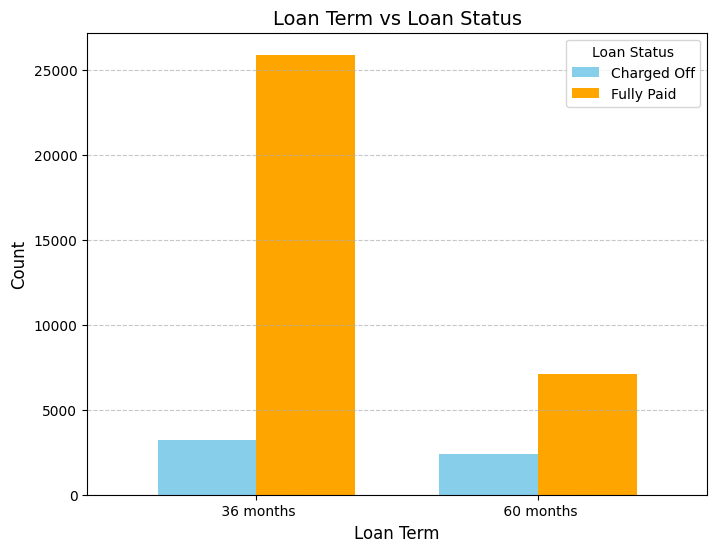

In [51]:
add_heading("Loan Term vs Loan Status")

loan_term_counts = cleaned_data.groupby(['term', 'loan_status']).size().unstack()

loan_term_counts.plot(kind='bar', figsize=(8, 6), color=['skyblue', 'orange', 'green'], width=0.7)
plt.title("Loan Term vs Loan Status", fontsize=14)
plt.xlabel("Loan Term", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Loan Status")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Analysis -
##    with longer loan term, people are more